In [3]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#1Load DataSet
#load the data file
file1=pd.read_csv('Downloads/banking.csv')
file2=pd.read_csv('Downloads/banking 2.csv')
file1
file2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y/n
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unemployed,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
# Combine the dataframes if necessary (assuming they have the same structure)
# If they have different structures, we need to handle them separately
if file1.columns.equals(file2.columns):
    file = pd.concat([file1,file2], ignore_index=True)
else:
    file = file1  # For now, just use the first dataframe


In [11]:
# Display basic information about the combined dataframe
file.shape

(49732, 17)

In [13]:
#check null or empty values and data type
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y/n        49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [15]:
file.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y/n          0
dtype: int64

In [17]:
#check distribution of numerical coloumns
file.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1415.874407,15.816315,258.690179,2.766549,40.307629,0.576892
std,10.615008,3019.511971,8.315680,257.743149,3.099075,100.067233,2.254838
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,131.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,481.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1440.250000,21.000000,320.000000,3.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
file.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y/n
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,1,0,unemployed,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,Telephone,3,jun,199,4,1,0,unemployed,no
4,59,blue-collar,married,secondary,no,0,yes,no,Telephone,5,may,226,1,1,0,unemployed,no


In [21]:
file.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y/n
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
49731,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [23]:
file.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y/n'],
      dtype='object')

C:\Users\aphat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


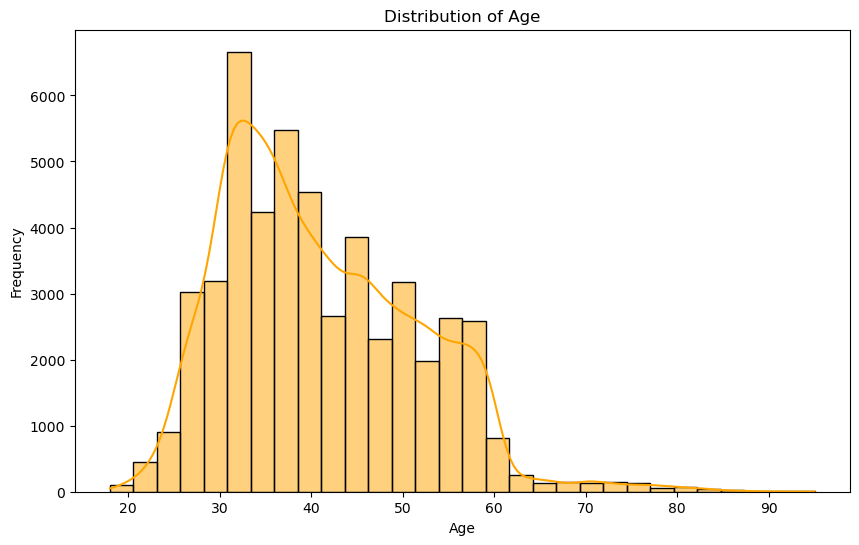

In [29]:
#plot1:Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(file["age"],kde=True,bins=30,color="orange")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

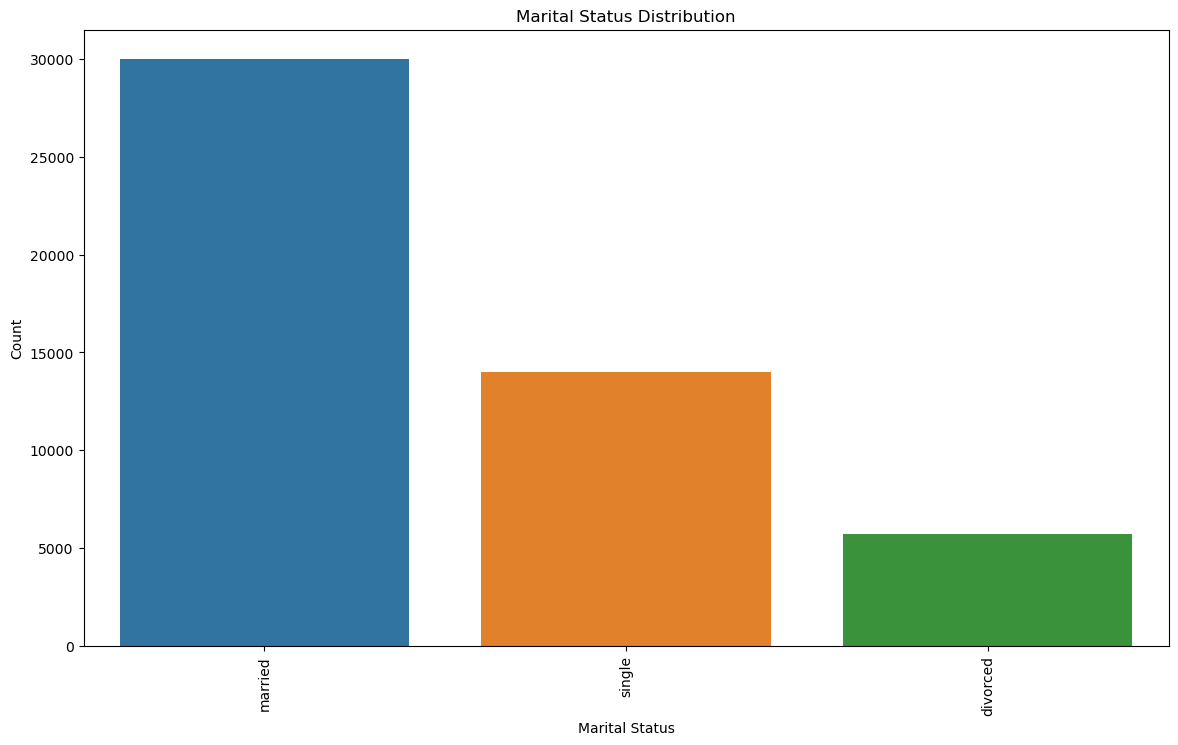

In [43]:
#plot2:Marital Status Distribution
plt.figure(figsize=(14,8))
sns.countplot(x="marital",data=file)
plt.xticks(rotation=90)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

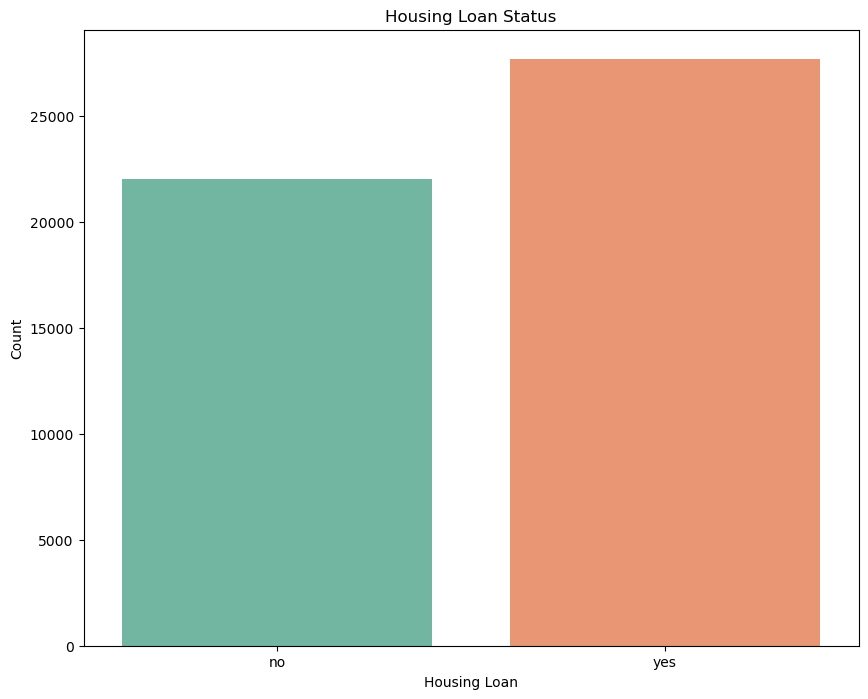

In [45]:
#plot3:Housing Loan Status
plt.figure(figsize=(10,8))
sns.countplot(x="housing",data=file,palette="Set2")
plt.title("Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.show()

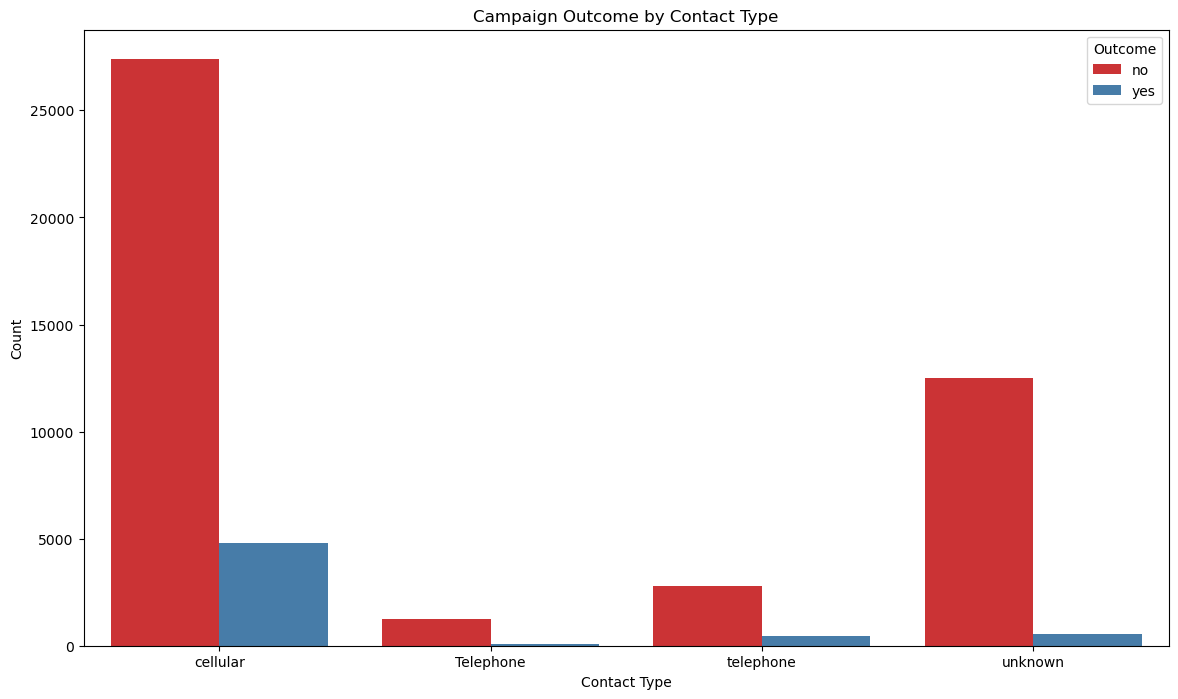

In [47]:
#plot4:Campaign outcome by contact type
plt.figure(figsize=(14,8))
sns.countplot(x="contact",hue="y/n",data=file,palette="Set1")
plt.title("Campaign Outcome by Contact Type")
plt.xlabel("Contact Type")
plt.ylabel("Count")
plt.legend(title="Outcome")
plt.show()

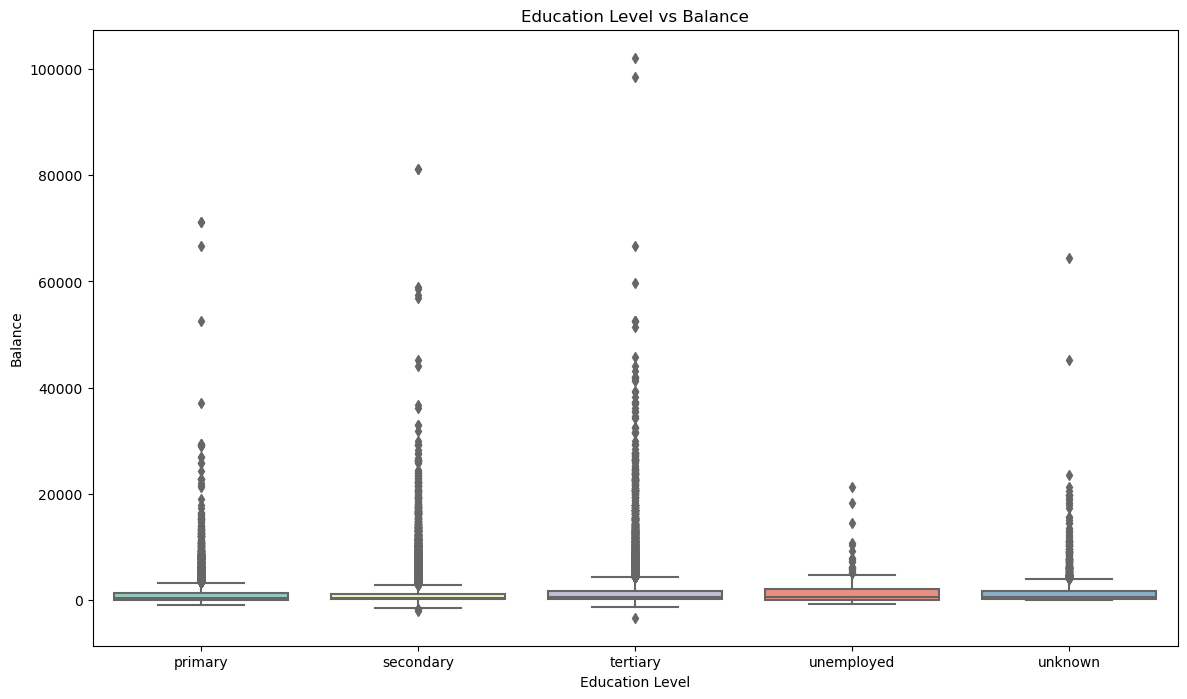

In [51]:
#plot5:Education Level vs Balance
plt.figure(figsize=(14,8))
sns.boxplot(x="education",y="balance",data=file,palette="Set3")
plt.title("Education Level vs Balance")
plt.xlabel("Education Level")
plt.ylabel("Balance")
plt.show()